# Cloudy models of NGC 346 bow shock around Walborn 3

In [25]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cmasher as cmr
import astropy.units as u
import sys
sys.path.append("../lib")
from cloudytab import cloudytab

In [54]:
m1 = cloudytab.CloudyModel("../cloudy/models/w3-n010")
m2 = cloudytab.CloudyModel("../cloudy/models/w3-n010-p")
m3 = cloudytab.CloudyModel("../cloudy/models/w3-n030-p")

In [55]:
m1.data.keys()

dict_keys(['Si', 'C', 'gdrift', 'ovr', 'Ne', 'Ar', 'gpot', 'gcont', 'phys', 'Cl', 'lina', 'gcharge', 'S', 'gabun', 'emis', 'O', 'N', 'cont', 'pre', 'gtemp', 'rad', 'lya'])

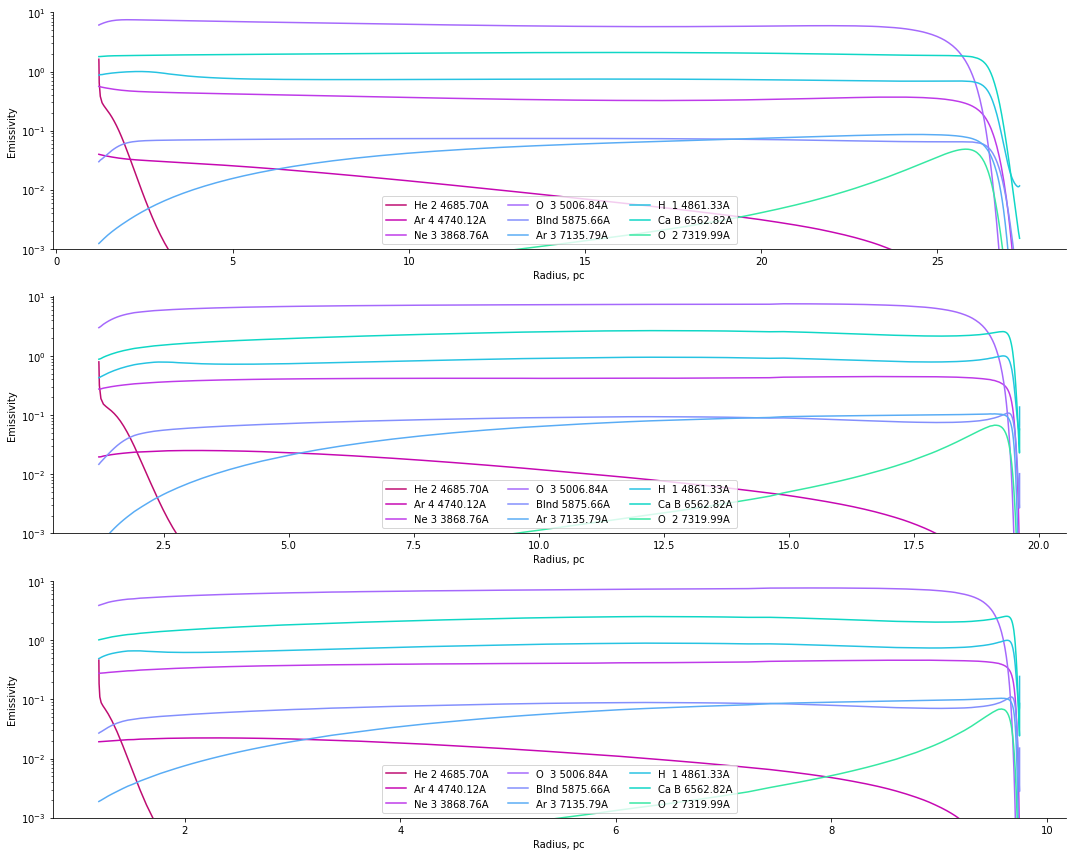

In [57]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))


# colnames = m.data["emis"].colnames[1:]

embands = [
 'He 2 4685.70A',
 'Ar 4 4740.12A',
 'Ne 3 3868.76A',
 'O  3 5006.84A',
 'Blnd 5875.66A',
 'Ar 3 7135.79A',
 'H  1 4861.33A',
 'Ca B 6562.82A',
 'O  2 7319.99A',
]

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.neon', 
    len(embands), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m1, m2, m3], axes):
    radius = m.data["rad"]["radius"] * u.cm.to(u.pc) 
    hb = m.data["emis"]['H  1 4861.33A'] 
    for emband, color in zip(embands, colors):
        em = m.data["emis"][emband] 
        ax.plot(radius, em / hb.max(), label=emband, color=color)
    ax.legend(ncol=3)
    ax.set(
        yscale="log",
        ylim=[0.001, 10.1],
        xlabel="Radius, pc",
        ylabel="Emissivity",
    )
sns.despine()
fig.tight_layout();

In [40]:
class C:
    def __init__(self, d):
        for k, v in d.items():
            setattr(self, k, v.to_pandas())

In [59]:
m1.p = C(m1.data)
m2.p = C(m2.data)
m3.p = C(m3.data)

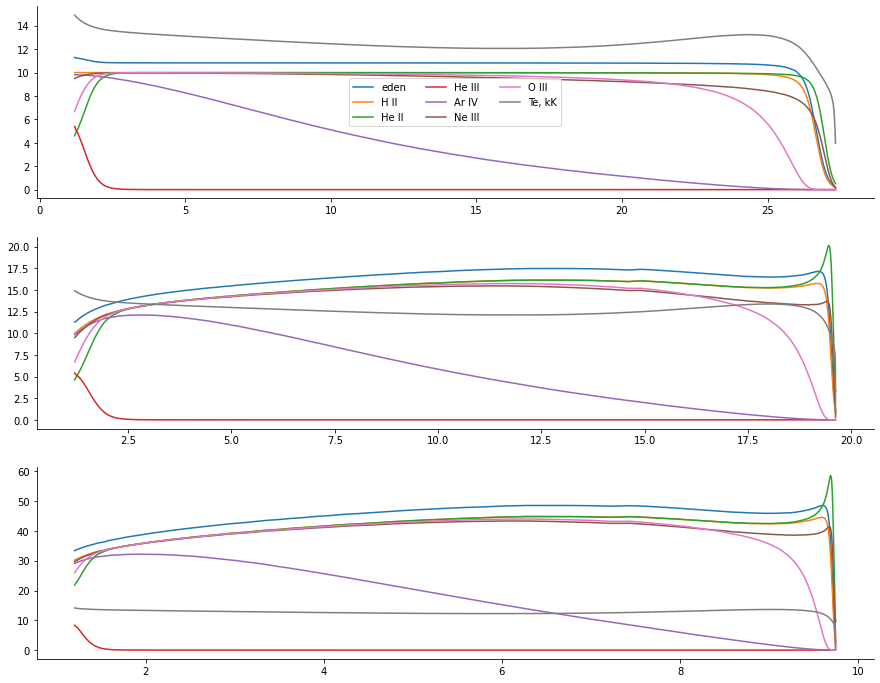

In [80]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
for m, ax in zip([m1, m2, m3], axes):
    m.radius = m.p.rad.radius * u.cm.to(u.pc) 
    ax.plot(m.radius, m.p.ovr.eden, label="eden")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HII, label="H II")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HeII, label="He II")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HeIII, label="He III")
    ax.plot(m.radius, m.p.ovr.hden * m.p.Ar["Ar+3"], label="Ar IV")
    ax.plot(m.radius, m.p.ovr.hden * m.p.Ne["Ne+2"], label="Ne III")
    ax.plot(m.radius, m.p.ovr.hden * m.p.O["O+2"], label="O III")
    ax.plot(m.radius, 0.001 * m.p.ovr.Te, label="Te, kK")
axes[0].legend(ncol=3)
sns.despine();

In [76]:
m.p.Ar

,depth,Ar,Ar+,Ar+2,Ar+3,Ar+4,Ar+5,Ar+6,Ar+7,Ar+8,Ar+9,Ar+10,Ar+11,Ar+12,Ar+13,Ar+14,Ar+15,Ar+16,Ar+17,Ar+18
0,1.249120e+15,1.680000e-13,2.200000e-07,0.01170,0.980,0.00788,0.000017,2.100000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.494690e+15,1.690000e-13,2.210000e-07,0.01180,0.980,0.00784,0.000017,2.100000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.247700e+16,1.760000e-13,2.270000e-07,0.01190,0.980,0.00764,0.000017,2.060000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.278190e+17,2.040000e-13,2.500000e-07,0.01250,0.981,0.00694,0.000016,1.940000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.815460e+17,2.580000e-13,2.920000e-07,0.01350,0.981,0.00599,0.000014,1.760000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,8.059020e+19,9.380000e-01,5.910000e-02,0.00283,0.000,0.00000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,8.059640e+19,9.390000e-01,5.860000e-02,0.00276,0.000,0.00000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,8.060230e+19,9.390000e-01,5.800000e-02,0.00269,0.000,0.00000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,8.060770e+19,9.400000e-01,5.750000e-02,0.00262,0.000,0.00000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
m.data["emis"].colnames

['depth',
 'O  1 6300.30A',
 'O  2 7319.99A',
 'O  2 7318.92A',
 'O  3 4363.21A',
 'O  3 5006.84A',
 'Ar 3 7135.79A',
 'Ar 4 4711.26A',
 'Ar 4 4740.12A',
 'Ar 4 7332.15A',
 'Ar 3 7751.11A',
 'Ne 3 3868.76A',
 'Ne 4 4724.17A',
 'S  3 6312.06A',
 'S  3 9068.62A',
 'H  1 4861.33A',
 'H  1 6562.81A',
 'Ca B 6562.81A',
 'Blnd 5875.66A',
 'IRAC 3.60000m',
 'IRAC 4.50000m',
 'IRAC 5.80000m',
 'IRAC 8.00000m',
 'F12 12.0000m',
 'F25 25.0000m',
 'MIPS 24.0000m',
 'PAC1 70.0000m',
 'PAC2 100.000m',
 'PAC3 160.000m']

In [ ]:
".in".strip